# **Modeling and Predicting Housing Prices in King County, USA: Analyzing House Sales Data**


**Author:** Hazman Naim Bin Ahsan

**Date of Completion:** 23/8/2023

In this notebook, I will be examining a dataset containing housing prices and creating machine learning models to predict these prices. The main purpose of this project is to practice my skills in data science and machine learning. To achieve this, I will be using various machine learning techniques, including linear regression, multiple linear regression, support vector regression, and random forest regressor.

Throughout this notebook, I will also perform necessary pre-processing on the dataset. In addition, I will use 5-fold cross-validation to ensure reliable model assessment and make use of hyperparameter tuning to fine-tune the models. At the conclusion of this notebook, I will provide visualizations that showcase the performance of these models. These visualizations will include residual plots, scatter plots, and distribution plots.

For this analysis, I've obtained the dataset from Kaggle. You can access the dataset through this link: [Kaggle Dataset: Housing Price Prediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

Through this project, I aim to further develop my data science and machine learning capabilities while gaining insights into predicting housing prices using a variety of methods.

# 1. Importing Modules and Packages, Reading Data, Defining Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data_NaN.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
def print_columns_by_dtype(data_frame):
    """
    Prints columns for each data type in the given DataFrame.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    unique_dtypes = data_frame.dtypes.unique()
    
    for dtype in unique_dtypes:
        matching_columns = [col for col in data_frame.columns if data_frame[col].dtypes == dtype]
        
        print("Columns with data type {}: {}".format(dtype, ', '.join(matching_columns)))
        print("------------------------------------------------------------")

def analyze_missing_values(data_frame):
    """
    Analyzes and prints missing values count and percentages for each column in the given DataFrame.
    The table is sorted from highest missing values count to lowest.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    missing_values_count = data_frame.isnull().sum()
    total_missing_values = missing_values_count.sum()

    # Calculate the percentage of missing values for each column
    total_rows = data_frame.shape[0]
    missing_percentage = (missing_values_count / total_rows) * 100

    # Create a list of tuples (column_name, missing_count, missing_percentage)
    missing_info = [(column, count, percentage) for column, count, percentage in zip(missing_values_count.index, missing_values_count.values, missing_percentage.values)]

    # Sort the list by missing_count in descending order
    missing_info.sort(key=lambda x: x[1], reverse=True)

    # Print the sorted table
    print("COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT")
    print("-----------------------------------------")
    for column, count, percentage in missing_info:
        print(f"{column}: {percentage:.2f}% ({count} missing)")

    print("\nMissing Values Count:")
    print(missing_values_count)
    print("\nTotal Missing Values:", total_missing_values)

def analyze_column_types(data_frame):
    """
    Analyzes and prints categorical and continuous columns along with their names and counts.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    categorical_columns = []
    continuous_columns = []
    
    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()
        
        if np.issubdtype(data_frame[col].dtype, np.number) and unique_count > 12:
            continuous_columns.append(col)
        else:
            categorical_columns.append(col)
    
    print("Numerical Non-continuous columns: {}".format(', '.join(categorical_columns)))
    print("Count: {}\n".format(len(categorical_columns)))
    
    print("Numerical Continuous columns: {}".format(', '.join(continuous_columns)))
    print("Count: {}\n".format(len(continuous_columns)))

# 2. Exploratory Data Analysis

## Data Cleaning

In [4]:
analyze_missing_values(df)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
bedrooms: 0.06% (13 missing)
bathrooms: 0.05% (10 missing)
Unnamed: 0: 0.00% (0 missing)
id: 0.00% (0 missing)
date: 0.00% (0 missing)
price: 0.00% (0 missing)
sqft_living: 0.00% (0 missing)
sqft_lot: 0.00% (0 missing)
floors: 0.00% (0 missing)
waterfront: 0.00% (0 missing)
view: 0.00% (0 missing)
condition: 0.00% (0 missing)
grade: 0.00% (0 missing)
sqft_above: 0.00% (0 missing)
sqft_basement: 0.00% (0 missing)
yr_built: 0.00% (0 missing)
yr_renovated: 0.00% (0 missing)
zipcode: 0.00% (0 missing)
lat: 0.00% (0 missing)
long: 0.00% (0 missing)
sqft_living15: 0.00% (0 missing)
sqft_lot15: 0.00% (0 missing)

Missing Values Count:
Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_

In [5]:
analyze_column_types(df)

Numerical Non-continuous columns: date, bedrooms, floors, waterfront, view, condition, grade
Count: 7

Numerical Continuous columns: Unnamed: 0, id, price, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
Count: 15



In [6]:
print_columns_by_dtype(df)

Columns with data type int64: Unnamed: 0, id, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15, sqft_lot15
------------------------------------------------------------
Columns with data type object: date
------------------------------------------------------------
Columns with data type float64: price, bedrooms, bathrooms, floors, lat, long
------------------------------------------------------------


Insights:
- There are only 2 columns that have "NaN" values in it.
- 2 Columns need to be dropped: 'Unnamed: 0'  and 'date'.
- All columns have correct data type.

In [7]:
column_drop = ['Unnamed: 0', 'date']
df.drop(columns=column_drop, inplace=True)

In [8]:
mean_bedrooms=df['bedrooms'].mean()
mean_bathrooms=df['bathrooms'].mean()

df['bedrooms'].replace(np.nan,mean_bedrooms, inplace=True)
df['bathrooms'].replace(np.nan,mean_bathrooms, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Feature Engineering

In [10]:
original_columns = df.columns

Calculating age for each house.

In [11]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [12]:
df_original = df.copy()

In [13]:
df = df_original.copy()

In [14]:
# Calculate age and create a new column
df['age'] = 2023 - df['yr_built'].astype(int)

In [15]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)

<Axes: xlabel='age', ylabel='Count'>

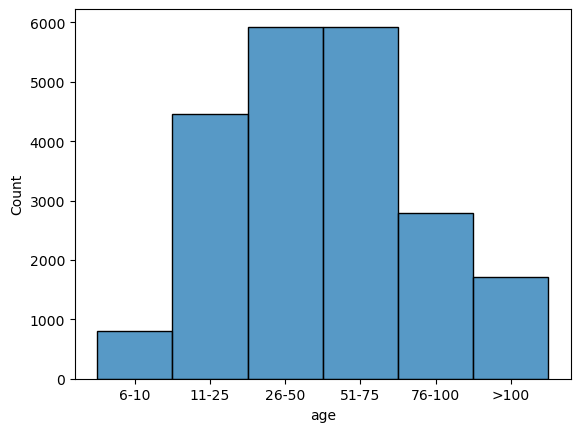

In [16]:
sns.histplot(x='age', data=df)

Calculating renovation age for each house.

In [17]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
# Calculate age_renovated only if yr_renovated is not 0
df['age_renovated'] = 2023 - df[df['yr_renovated'] != 0]['yr_renovated'].astype(int)
df['age_renovated'][df['age_renovated'].isnull()] = 0

In [19]:
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df['age_renovated'] = pd.cut(df['age_renovated'], bins=bins, labels=labels)

<Axes: xlabel='age_renovated', ylabel='Count'>

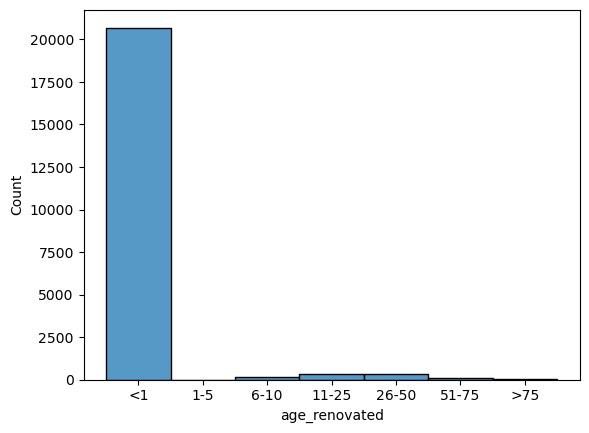

In [20]:
sns.histplot(x='age_renovated', data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  int64   
 1   price          21613 non-null  float64 
 2   bedrooms       21613 non-null  float64 
 3   bathrooms      21613 non-null  float64 
 4   sqft_living    21613 non-null  int64   
 5   sqft_lot       21613 non-null  int64   
 6   floors         21613 non-null  float64 
 7   waterfront     21613 non-null  int64   
 8   view           21613 non-null  int64   
 9   condition      21613 non-null  int64   
 10  grade          21613 non-null  int64   
 11  sqft_above     21613 non-null  int64   
 12  sqft_basement  21613 non-null  int64   
 13  yr_built       21613 non-null  int64   
 14  yr_renovated   21613 non-null  int64   
 15  zipcode        21613 non-null  int64   
 16  lat            21613 non-null  float64 
 17  long           21613 non-null  

In [22]:
df = pd.get_dummies(df, columns=['age','age_renovated'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21613 non-null  int64  
 1   price                21613 non-null  float64
 2   bedrooms             21613 non-null  float64
 3   bathrooms            21613 non-null  float64
 4   sqft_living          21613 non-null  int64  
 5   sqft_lot             21613 non-null  int64  
 6   floors               21613 non-null  float64
 7   waterfront           21613 non-null  int64  
 8   view                 21613 non-null  int64  
 9   condition            21613 non-null  int64  
 10  grade                21613 non-null  int64  
 11  sqft_above           21613 non-null  int64  
 12  sqft_basement        21613 non-null  int64  
 13  yr_built             21613 non-null  int64  
 14  yr_renovated         21613 non-null  int64  
 15  zipcode              21613 non-null 

In [24]:
df_copy = df.copy()

Note:
- 2 data created, df and df_original
- df: preprocessed dataset
- df_original: no  preprocessed dataset

## Correlation and Relationship

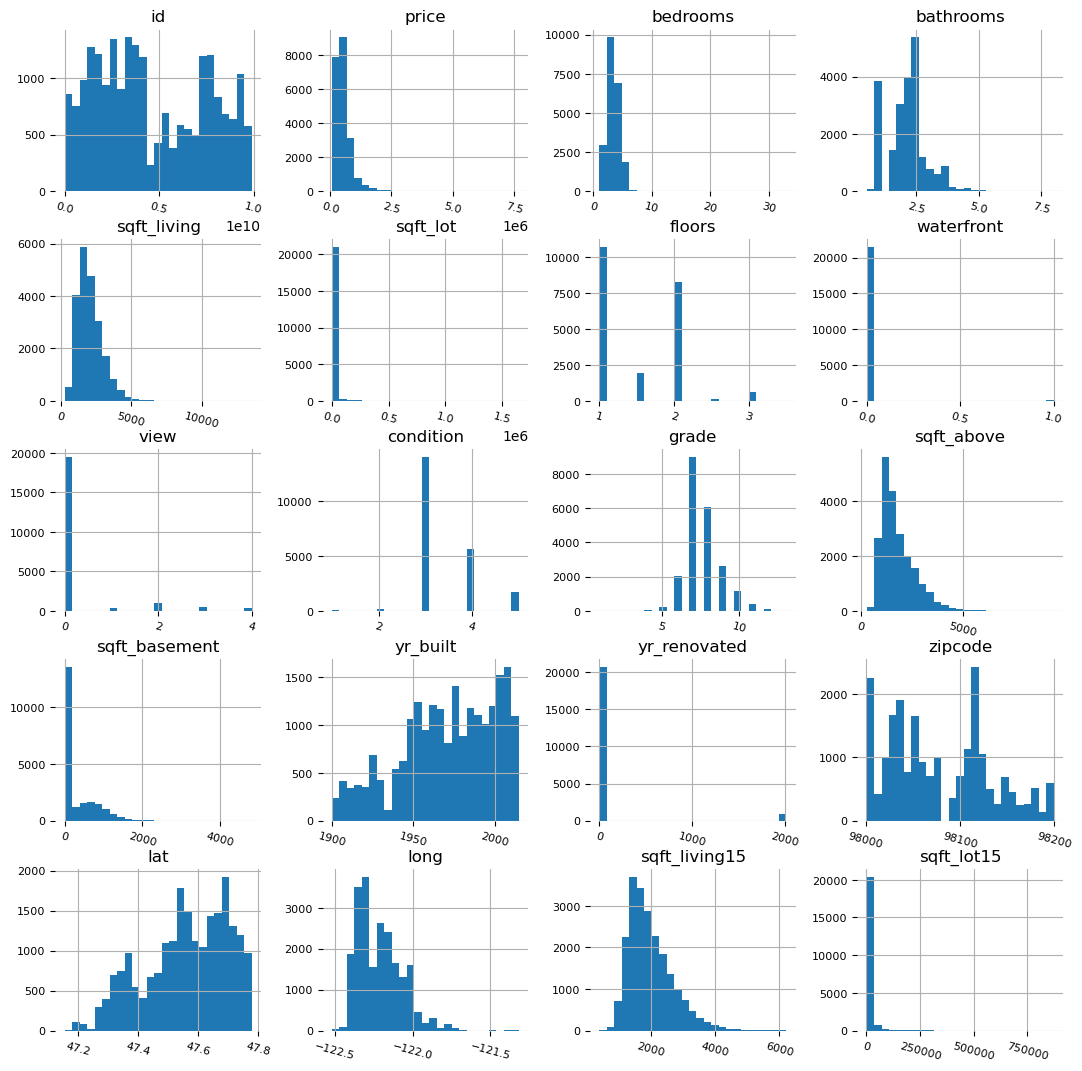

In [25]:
h = df_original.hist(bins=25,figsize=(13,13),xlabelsize='8',ylabelsize='8',xrot=-15)
sns.despine(left=True, bottom=True)

[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Numerical Non-continuous Columns: floors, waterfront, view, condition, grade
- Use **boxplot** to visualize the correlation with 'price'

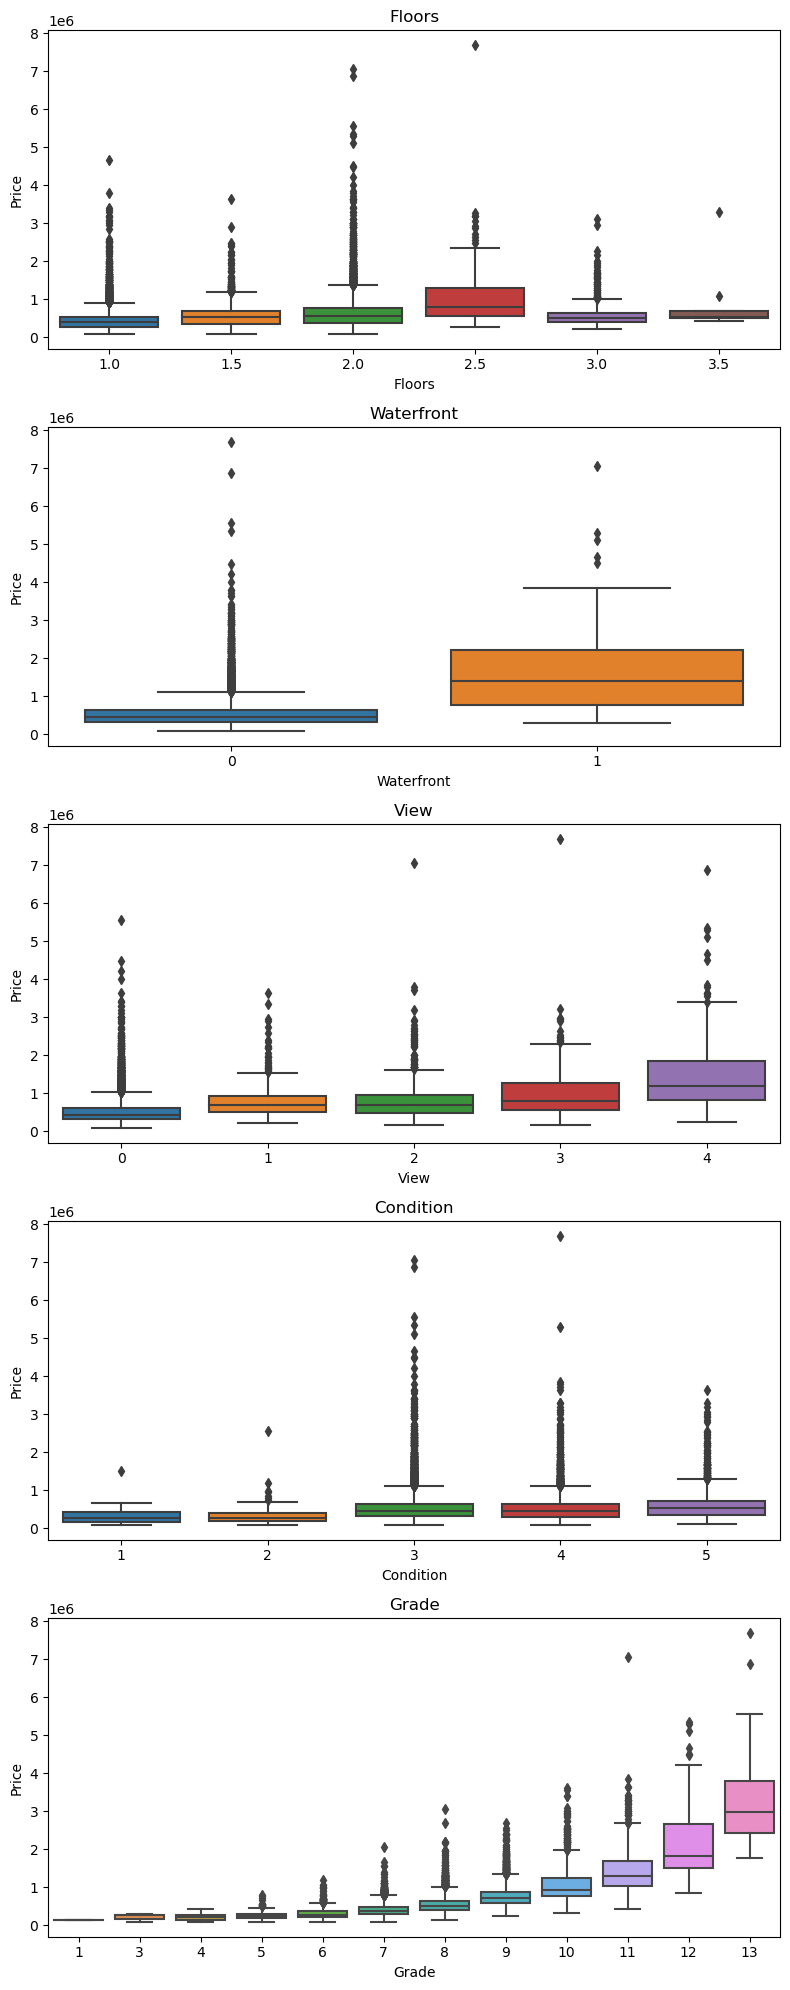

In [26]:
columns = ['floors', 'waterfront', 'view', 'condition', 'grade']

fig, axs = plt.subplots(len(columns), figsize=(8, 4*len(columns)))

for i, column in enumerate(columns):
    sns.boxplot(x=df_original[column], y=df['price'], ax=axs[i])
    axs[i].set_title(column.capitalize())
    axs[i].set_xlabel(column.capitalize())
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

Insights:
- The grade of a house and its waterfront location have a noticeable impact on its price.
- While the view also influences the house price, its effect is comparatively less significant.
- The number of floors and the condition of the house appear to have minimal observable effects on the price.

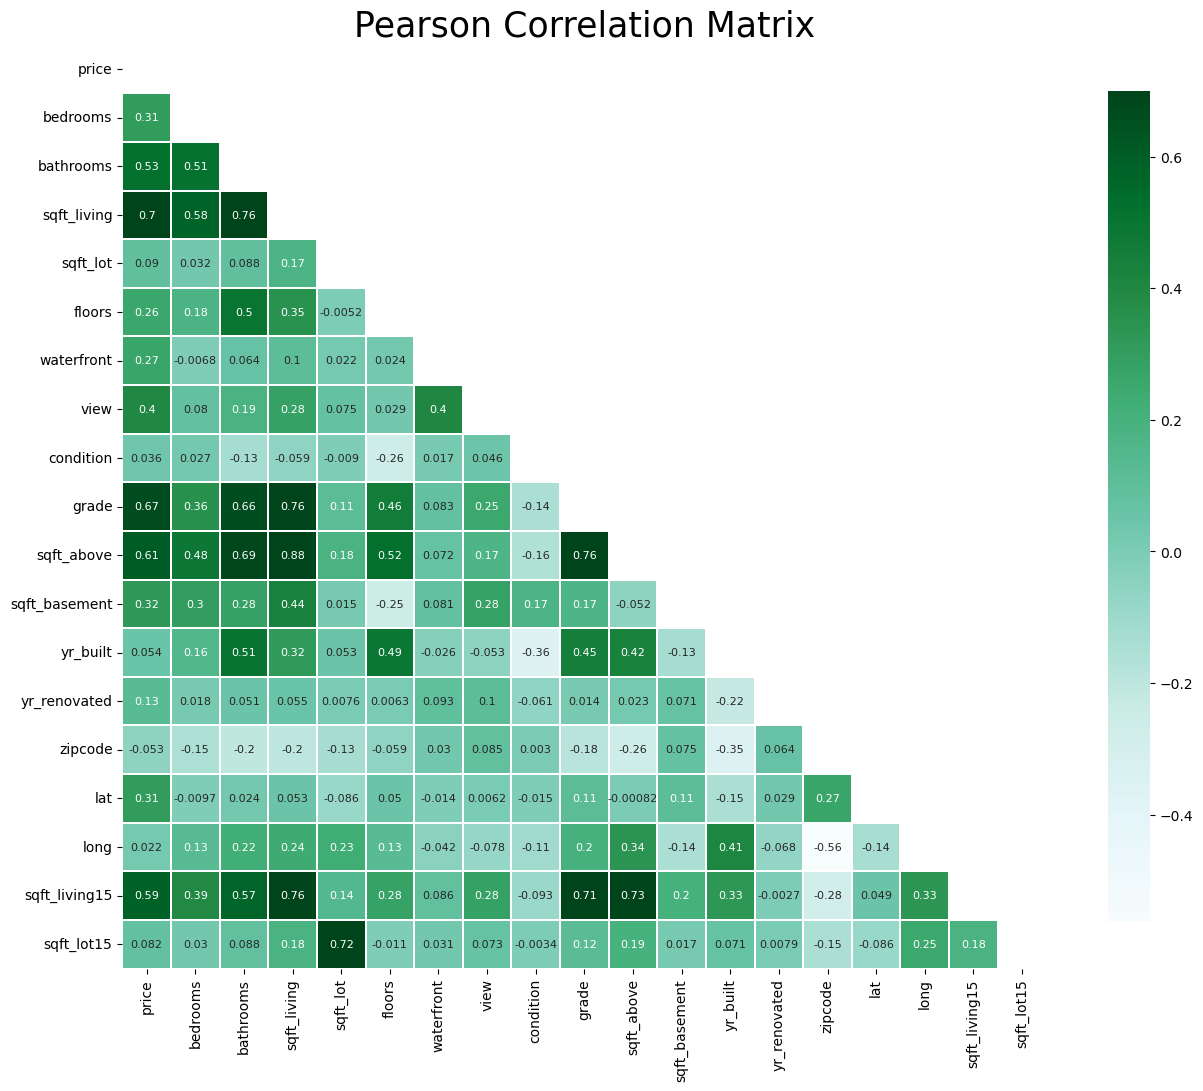

In [27]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df_original[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_original[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [28]:
df_original.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_<1', 'age_1-5', 'age_6-10',
       'age_11-25', 'age_26-50', 'age_51-75', 'age_76-100', 'age_>100',
       'age_renovated_<1', 'age_renovated_1-5', 'age_renovated_6-10',
       'age_renovated_11-25', 'age_renovated_26-50', 'age_renovated_51-75',
       'age_renovated_>75'],
      dtype='object')

# 3. Model Development

In [30]:
models_table = pd.DataFrame(columns=["Model", "Model Alias", "Detail","R2 Score (Train)", "Adjusted R2 Score (Train)", "RMSE (Test)", "R2 Score (Test)", "Adjusted R2 Score (Test)",
                                     "Cross-Validated RMSE","Cross-Validated R2 Score"])
models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score


In [31]:
from sklearn.model_selection import train_test_split

x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [32]:
x_data0 = df_original.drop("price", axis=1)
y_data0 = df_original["price"]

x_train0, x_test0, y_train0, y_test0 = train_test_split(x_data0, y_data0, test_size=0.10, random_state=1)


print("number of test samples :", x_test0.shape[0])
print("number of training samples:",x_train0.shape[0])

number of test samples : 2162
number of training samples: 19451


In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_fold(model):
    Rcross = cross_val_score(model, x_data, y_data, cv=5).mean()
    RMSEcross = np.sqrt(-cross_val_score(model,x_data, y_data, scoring="neg_mean_squared_error", cv=4)).mean()
    return Rcross, RMSEcross

def evaluation_train(y, predictions):
    r2_train = r2_score(y, predictions)
    return r2_train

def evaluation_test(y, predictions):
    rmse_test = np.sqrt(mean_squared_error(y, predictions))
    r2_test = r2_score(y, predictions)
    return rmse_test, r2_test

def R2_train_adjusted(r_squared,n,k):
    adjusted_r2 = r2_train-(k-1)/(n-k)*(1-r2_train)
    return adjusted_r2

def R2_test_adjusted(r_squared,n,k):
    adjusted_r2_train = r2_test-(k-1)/(n-k)*(1-r2_test)
    return adjusted_r2_train

## Simple Linear Regression

The Simple Linear Regressor is a foundational machine learning algorithm used for regression tasks. It focuses on modeling the relationship between two variables: a single independent variable and a dependent variable. This technique aims to find the best-fit line that minimizes the difference between the observed data points and the predicted values, allowing us to make predictions and understand the linear association between the variables. While it might not capture complex relationships like more advanced methods, the Simple Linear Regressor serves as a crucial building block in understanding regression concepts and forms the basis for more sophisticated regression techniques.

In [34]:
from sklearn.linear_model import LinearRegression

# Train the model
slr = LinearRegression()

X1 = x_train[['sqft_living']]
Y1 = y_train
slr.fit(X1,Y1)

# Model Prediction
predictions_train = slr.predict(x_train[['sqft_living']])
predictions_test = slr.predict(x_test[['sqft_living']])

# Validate Model Performance
r2_train = r2_score(y_train, predictions_train)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
r2_test = r2_score(y_test, predictions_test)
#adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
#adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("SIMPLE LINEAR REGRESSION")
print("-"*30)
print("R2 Score (Train):", r2_train)
#print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
#print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(slr, x_data[['sqft_living']], y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(slr,x_data[['sqft_living']], y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Simple Linear Regression",
           "Model Alias": "slr",
           "Detail": "sqft_living",
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": "-",
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": "-",
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
SIMPLE LINEAR REGRESSION
------------------------------
R2 Score (Train): 0.4938445479924307
RMSE (Test): 287447.93246778427
R2 Score (Test): 0.48489043226442774
------------------------------
RMSE Cross-Validation: 261378.2686666379
R2 Score Cross-Validation: 0.4910862905377124


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.48489,-,261378.268667,0.491086


## Multiple Linear Regression

The Multiple Linear Regressor is a fundamental machine learning algorithm used for regression analysis. It extends the concept of simple linear regression by considering multiple predictor variables to model the relationship between the independent and dependent variables. This enables the algorithm to capture more complex interactions and correlations within the data. By accounting for multiple predictors, the Multiple Linear Regressor aims to provide a more accurate representation of the underlying relationships and improve the predictive performance compared to simple linear regression.

### Multiple Linear Regression-1

In [35]:
n = x_data0.shape[0]
k = len(x_data0.columns)

# Train the Model
mlr1 = LinearRegression()

X = x_train0
Y = y_train0
mlr1.fit(X,Y)

# Model Prediction
predictions_train = mlr1.predict(x_train0)
predictions_test = mlr1.predict(x_test0)

# Validate Model Performance
r2_train = evaluation_train(y_train0, predictions_train)
rmse_test, r2_test = evaluation_test(y_test0, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("SIMPLE LINEAR REGRESSION")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(mlr1, x_data0, y_data0, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(mlr1,x_data0, y_data0, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Multiple Linear Regression-1",
           "Model Alias": "mlr1",
           "Detail": "Features (All), No Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
SIMPLE LINEAR REGRESSION
------------------------------
R2 Score (Train): 0.7022875110139354
Adjusted R2 Score (Train): 0.7020393483390373
RMSE (Test): 226408.02032557238
R2 Score (Test): 0.6804308461080721
Adjusted R2 Score (Test): 0.6801644644849335
------------------------------
RMSE Cross-Validation: 202505.04119562512
R2 Score Cross-Validation: 0.694682880254011


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683


### Multiple Linear Regression-2

In [36]:
important_cols = list(df.corr()["price"][(df.corr()["price"]>0.1) | (df.corr()["price"]<-0.1)].index)

df1 = df[important_cols]
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15', 'age_51-75', 'age_renovated_<1',
       'age_renovated_11-25'],
      dtype='object')

In [37]:
x_data = df1.drop("price", axis=1)
y_data = df1["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [38]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model
mlr2 = LinearRegression()

X = x_train
Y = y_train
mlr2.fit(X,Y)

# Model Prediction
predictions_train = mlr2.predict(x_train)
predictions_test = mlr2.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("MULTIPLE LINEAR REGRESSION-2")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(mlr2, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(mlr2,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Multiple Linear Regression-2",
           "Model Alias": "mlr2",
           "Detail": "Features (corr>0.1), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
MULTIPLE LINEAR REGRESSION-2
------------------------------
R2 Score (Train): 0.6642860874887115
Adjusted R2 Score (Train): 0.6640684749887042
RMSE (Test): 237056.1832386789
R2 Score (Test): 0.6496647691868842
Adjusted R2 Score (Test): 0.6494376790289351
------------------------------
RMSE Cross-Validation: 213961.54488355108
R2 Score Cross-Validation: 0.6589736203379557


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974


### Multiple Linear Regression-3

In [39]:
important_cols = list(df.corr()["price"][(df.corr()["price"]>0.5) | (df.corr()["price"]<-0.5)].index)

df1 = df[important_cols]

x_data = df1.drop("price", axis=1)
y_data = df1["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [40]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model
mlr3 = LinearRegression()

X = x_train
Y = y_train
mlr3.fit(X,Y)

# Model Prediction
predictions_train = mlr3.predict(x_train)
predictions_test = mlr3.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("MULTIPLE LINEAR REGRESSION-2")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(mlr3, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(mlr3,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Multiple Linear Regression-3",
           "Model Alias": "mlr3",
           "Detail": "Features (corr>0.5), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
MULTIPLE LINEAR REGRESSION-2
------------------------------
R2 Score (Train): 0.5454296334629767
Adjusted R2 Score (Train): 0.5453454849315925
RMSE (Test): 273432.50669089827
R2 Score (Test): 0.533897399588378
Adjusted R2 Score (Test): 0.533811116248798
------------------------------
RMSE Cross-Validation: 248197.08824559688
R2 Score Cross-Validation: 0.5412849636160003


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285


### Multiple Linear Regression-4

In [41]:
x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [42]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model
mlr4 = LinearRegression()

X = x_train
Y = y_train
mlr4.fit(X,Y)

# Model Prediction
predictions_train = mlr4.predict(x_train)
predictions_test = mlr4.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("MULTIPLE LINEAR REGRESSION-4")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(mlr4, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(mlr4,x_data, y_data0, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Multiple Linear Regression-4",
           "Model Alias": "mlr4",
           "Detail": "Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
MULTIPLE LINEAR REGRESSION-4
------------------------------
R2 Score (Train): 0.7090469089955639
Adjusted R2 Score (Train): 0.7086019647440626
RMSE (Test): 223105.24112007325
R2 Score (Test): 0.6896864186382093
Adjusted R2 Score (Test): 0.6892118670748867
------------------------------
RMSE Cross-Validation: 200182.20854282397
R2 Score Cross-Validation: 0.7017020255276949


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702


**Insights:**
- The model that incorporates all features appears to yield a lower RMSE in comparison to models that exclude some features.
- The Multiple Linear Regression model improves the regression fit relative to the Simple Linear Regression model.
- The model with pre-processed features (mlr4) exhibits the most optimal regression fit, as evidenced by the highest R2 score and the lowest RMSE.

## Ridge Regression

The Ridge Regressor is a regression algorithm that addresses the issue of multicollinearity in multiple linear regression. It extends the concept of linear regression by adding a regularization term to the cost function. This regularization term, controlled by a hyperparameter called alpha, helps prevent overfitting by penalizing large coefficients of the predictor variables. The Ridge Regressor aims to find the best-fit line that not only fits the data well but also keeps the magnitudes of the coefficients in check. It achieves this by adding a penalty term to the sum of squared errors, encouraging smaller coefficient values. Compared to simple linear regression, the Ridge Regressor introduces regularization, which reduces the risk of overfitting in cases where there are high correlations between predictor variables. By controlling the alpha parameter, the algorithm balances between fitting the data closely and preventing the model from becoming too complex.

### Ridge Regression-1

In [43]:
'''
df - NON-PROCESSED DATA 
'''
x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [44]:
from sklearn.linear_model import Ridge

n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 1)
rm1 = Ridge(alpha=1)

X = x_train
Y = y_train

rm1.fit(x_train, y_train)
predictions = rm1.predict(x_test)

# Model Prediction
predictions_train = rm1.predict(x_train)
predictions_test = rm1.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RIDGE REGRESSION-1")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rm1, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rm1,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Ridge Regression-1",
           "Model Alias": "rm1",
           "Detail": "alpha = 1, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RIDGE REGRESSION-1
------------------------------
R2 Score (Train): 0.7090095802619842
Adjusted R2 Score (Train): 0.7085645789249735
RMSE (Test): 223218.5522255618
R2 Score (Test): 0.6893711333151007
Adjusted R2 Score (Test): 0.6888960995971063
------------------------------
RMSE Cross-Validation: 200167.33809562895
R2 Score Cross-Validation: 0.7017486248784672


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749


### Ridge Regression-2

In [45]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 10)
rm2 = Ridge(alpha=10)

X = x_train
Y = y_train

rm2.fit(x_train, y_train)
predictions = rm2.predict(x_test)

# Model Prediction
predictions_train = rm2.predict(x_train)
predictions_test = rm2.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RIDGE REGRESSION-2")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rm2, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rm2,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Ridge Regression-2",
           "Model Alias": "rm2",
           "Detail": "alpha = 10, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RIDGE REGRESSION-2
------------------------------
R2 Score (Train): 0.7088651925566405
Adjusted R2 Score (Train): 0.7084199704126287
RMSE (Test): 223701.62159370803
R2 Score (Test): 0.6880252088218874
Adjusted R2 Score (Test): 0.6875481168292614
------------------------------
RMSE Cross-Validation: 200153.88392658852
R2 Score Cross-Validation: 0.7018056379435077


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806


### Ridge Regression-3

In [46]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 100)
rm3 = Ridge(alpha=100)

X = x_train
Y = y_train

rm3.fit(x_train, y_train)
predictions = rm3.predict(x_test)

# Model Prediction
predictions_train = rm3.predict(x_train)
predictions_test = rm3.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RIDGE REGRESSION-3")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rm3, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rm3,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Ridge Regression-3",
           "Model Alias": "rm3",
           "Detail": "alpha = 100, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RIDGE REGRESSION-3
------------------------------
R2 Score (Train): 0.7029321785106286
Adjusted R2 Score (Train): 0.7024778832184858
RMSE (Test): 227737.91183246888
R2 Score (Test): 0.6766656042407584
Adjusted R2 Score (Test): 0.6761711404073993
------------------------------
RMSE Cross-Validation: 202259.4044304032
R2 Score Cross-Validation: 0.6955689209210345


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569


### Ridge Regression-4

In [47]:
'''
df1 PRE-PROCESSED DATA WITH FEATURES SELECTION
'''

important_cols = list(df.corr()["price"][(df.corr()["price"]>0.1) | (df.corr()["price"]<-0.1)].index)

df1 = df[important_cols]

x_data = df1.drop("price", axis=1)
y_data = df1["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15', 'age_51-75', 'age_renovated_<1',
       'age_renovated_11-25'],
      dtype='object')


In [48]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 10)
rm4 = Ridge(alpha=10)

X = x_train
Y = y_train

rm4.fit(x_train, y_train)
predictions = rm4.predict(x_test)

# Model Prediction
predictions_train = rm4.predict(x_train)
predictions_test = rm4.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RIDGE REGRESSION-4")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rm4, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rm4,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Ridge Regression-4",
           "Model Alias": "rm4",
           "Detail": "alpha = 10, Features (corr>0.1), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RIDGE REGRESSION-4
------------------------------
R2 Score (Train): 0.6639341096336964
Adjusted R2 Score (Train): 0.6637162689787687
RMSE (Test): 237539.60672105546
R2 Score (Test): 0.6482344503374474
Adjusted R2 Score (Test): 0.6480064330351382
------------------------------
RMSE Cross-Validation: 214021.9960541727
R2 Score Cross-Validation: 0.6588060256542357


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806


### Ridge Regression-5

In [49]:
# models_table = models_table.drop(models_table.index[9:])

In [50]:
'''
df1 PRE-PROCESSED DATA WITH FEATURES SELECTION
'''

important_cols = list(df.corr()["price"][(df.corr()["price"]>0.5) | (df.corr()["price"]<-0.5)].index)

df1 = df[important_cols]

x_data = df1.drop("price", axis=1)
y_data = df1["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')


In [51]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 10)
rm5 = Ridge(alpha=10)

X = x_train
Y = y_train

rm5.fit(x_train, y_train)
predictions = rm5.predict(x_test)

# Model Prediction
predictions_train = rm5.predict(x_train)
predictions_test = rm5.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RIDGE REGRESSION-5")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rm5, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rm5,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Ridge Regression-5",
           "Model Alias": "rm5",
           "Detail": "alpha = 10, Features (corr>0.5), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RIDGE REGRESSION-5
------------------------------
R2 Score (Train): 0.5454295637142339
Adjusted R2 Score (Train): 0.5453454151699382
RMSE (Test): 273434.753928342
R2 Score (Test): 0.5338897381180339
Adjusted R2 Score (Test): 0.5338034533601883
------------------------------
RMSE Cross-Validation: 248197.4253030036
R2 Score Cross-Validation: 0.5412841042816154


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


## Lasso Regression

The Lasso (Least Absolute Shrinkage and Selection Operator) Regressor is another regression technique that addresses multicollinearity and performs feature selection simultaneously. Similar to the Ridge Regressor, it adds a regularization term to the cost function, but it uses the absolute values of coefficients instead. The Lasso Regressor not only aims to minimize the sum of squared errors but also encourages some coefficients to become exactly zero. This leads to feature selection, where less relevant predictors are effectively excluded from the model. Compared to both simple linear regression and Ridge Regression, the Lasso Regressor offers more aggressive feature selection by forcing some coefficients to be exactly zero. This can lead to a simpler model with only the most important predictors, aiding in interpretability and potentially improving the model's generalization to unseen data. Like Ridge, the Lasso's behavior is also controlled by the alpha parameter.

### Lasso Regression-1

In [52]:
'''
df - NON-PROCESSED DATA 
'''
x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_<1', 'age_1-5', 'age_6-10',
       'age_11-25', 'age_26-50', 'age_51-75', 'age_76-100', 'age_>100',
       'age_renovated_<1', 'age_renovated_1-5', 'age_renovated_6-10',
       'age_renovated_11-25', 'age_renovated_26-50', 'age_renovated_51-75',
       'age_renovated_>75'],
      dtype='object')


In [53]:
from sklearn.linear_model import Lasso

n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 1)
lm1 = Lasso(alpha=1)

X = x_train
Y = y_train

lm1.fit(x_train, y_train)
predictions = lm1.predict(x_test)

# Model Prediction
predictions_train = lm1.predict(x_train)
predictions_test = lm1.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("LASSO REGRESSION-1")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(lm1, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(lm1,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Lasso Regression-1",
           "Model Alias": "lm1",
           "Detail": "alpha = 1, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
LASSO REGRESSION-1
------------------------------
R2 Score (Train): 0.7090117925148618
Adjusted R2 Score (Train): 0.708566794560971
RMSE (Test): 223166.63370039398
R2 Score (Test): 0.6895156151866344
Adjusted R2 Score (Test): 0.689040802419646
------------------------------
RMSE Cross-Validation: 200175.5423990645
R2 Score Cross-Validation: 0.701722122380352


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


### Lasso Regression-2

In [54]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 10)
lm2 = Lasso(alpha=10)

X = x_train
Y = y_train

lm2.fit(x_train, y_train)
predictions = lm2.predict(x_test)

# Model Prediction
predictions_train = lm2.predict(x_train)
predictions_test = lm2.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("LASSO REGRESSION-2")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(lm2, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(lm2,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Lasso Regression-2",
           "Model Alias": "lm2",
           "Detail": "alpha = 10, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
LASSO REGRESSION-2
------------------------------
R2 Score (Train): 0.7090084038767637
Adjusted R2 Score (Train): 0.7085634007407488
RMSE (Test): 223188.10052991234
R2 Score (Test): 0.6894558801284714
Adjusted R2 Score (Test): 0.6889809760107755
------------------------------
RMSE Cross-Validation: 200165.2065513641
R2 Score Cross-Validation: 0.7017532068664692


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


### Lasso Regression-3

In [55]:
'''
df1 PRE-PROCESSED DATA WITH FEATURES SELECTION
'''

important_cols = list(df.corr()["price"][(df.corr()["price"]>0.1) | (df.corr()["price"]<-0.1)].index)

df1 = df[important_cols]

x_data = df1.drop("price", axis=1)
y_data = df1["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15', 'age_51-75', 'age_renovated_<1',
       'age_renovated_11-25'],
      dtype='object')


In [56]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (a = 10)
lm3 = Lasso(alpha=10)

X = x_train
Y = y_train

lm3.fit(x_train, y_train)
predictions = lm3.predict(x_test)

# Model Prediction
predictions_train = lm3.predict(x_train)
predictions_test = lm3.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("LASSO REGRESSION-3")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(lm3, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(lm3,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Lasso Regression-3",
           "Model Alias": "lm3",
           "Detail": "alpha = 10, Features (corr>0.1), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
LASSO REGRESSION-3
------------------------------
R2 Score (Train): 0.6640632064821554
Adjusted R2 Score (Train): 0.6638454495088593
RMSE (Test): 237086.5883302549
R2 Score (Test): 0.6495748946453579
Adjusted R2 Score (Test): 0.649347746229997
------------------------------
RMSE Cross-Validation: 213993.93152013127
R2 Score Cross-Validation: 0.6588642154711986


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


## Random Forest Regressor

The Random Forest Regressor is a powerful machine learning algorithm used for regression tasks. It is an ensemble learning method that combines the predictions of multiple individual decision trees to provide accurate and robust predictions. Unlike a single decision tree, which can be prone to overfitting and sensitivity to small variations in the data, the Random Forest Regressor overcomes these limitations by aggregating the outputs of many trees. This leads to improved generalization and better performance on both training and unseen data.

### Random Forest Regressor

In [57]:
'''
df - PROCESSED DATA 
'''
x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_<1', 'age_1-5', 'age_6-10',
       'age_11-25', 'age_26-50', 'age_51-75', 'age_76-100', 'age_>100',
       'age_renovated_<1', 'age_renovated_1-5', 'age_renovated_6-10',
       'age_renovated_11-25', 'age_renovated_26-50', 'age_renovated_51-75',
       'age_renovated_>75'],
      dtype='object')


In [58]:
from sklearn.ensemble import RandomForestRegressor

n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model
rf1 = RandomForestRegressor()

rf1.fit(x_train, y_train)
predictions = rf1.predict(x_test)

# Model Prediction
predictions_train = rf1.predict(x_train)
predictions_test = rf1.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RANDOM FOREST REGRESSOR-1")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rf1, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rf1,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor-1",
           "Model Alias": "rf1",
           "Detail": "Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RANDOM FOREST REGRESSOR-1
------------------------------
R2 Score (Train): 0.982731704946064
Adjusted R2 Score (Train): 0.9827052971543786
RMSE (Test): 141516.3320495636
R2 Score (Test): 0.8751483272513415
Adjusted R2 Score (Test): 0.8749573960126045
------------------------------
RMSE Cross-Validation: 130135.36492370095
R2 Score Cross-Validation: 0.8763126231176356


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


### Random Forest Regressor-2

In [59]:
'''
df1 PRE-PROCESSED DATA WITH FEATURES SELECTION
'''

important_cols = list(df.corr()["price"][(df.corr()["price"]>0.1) | (df.corr()["price"]<-0.1)].index)

df1 = df[important_cols]

x_data = df1.drop("price", axis=1)
y_data = df1["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15', 'age_51-75', 'age_renovated_<1',
       'age_renovated_11-25'],
      dtype='object')


In [60]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model
rf2 = RandomForestRegressor()

rf2.fit(x_train, y_train)
predictions = rf2.predict(x_test)

# Model Prediction
predictions_train = rf2.predict(x_train)
predictions_test = rf2.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RANDOM FOREST REGRESSOR-2")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rf2, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rf2,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor-2",
           "Model Alias": "rf2",
           "Detail": "Features (corr>0.1), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RANDOM FOREST REGRESSOR-2
------------------------------
R2 Score (Train): 0.9737700302413195
Adjusted R2 Score (Train): 0.9737530277606906
RMSE (Test): 172362.5419086653
R2 Score (Test): 0.8147888968204771
Adjusted R2 Score (Test): 0.8146688414706987
------------------------------
RMSE Cross-Validation: 158550.17820355092
R2 Score Cross-Validation: 0.810960065889803


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


### Random Forest Regressor-3

In [61]:
'''
df - NONPROCESSED DATA 
'''
x_data = df_original.drop("price", axis=1)
y_data = df_original["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [62]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model
rf3 = RandomForestRegressor()

rf3.fit(x_train, y_train)
predictions = rf3.predict(x_test)

# Model Prediction
predictions_train = rf3.predict(x_train)
predictions_test = rf3.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RANDOM FOREST REGRESSOR-3")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rf3, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rf3,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor-3",
           "Model Alias": "rf3",
           "Detail": "Features (All), No Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RANDOM FOREST REGRESSOR-3
------------------------------
R2 Score (Train): 0.9829468519993064
Adjusted R2 Score (Train): 0.9829326370940544
RMSE (Test): 142265.7525051132
R2 Score (Test): 0.8738224853024007
Adjusted R2 Score (Test): 0.8737173081576125
------------------------------
RMSE Cross-Validation: 129475.66805930281
R2 Score Cross-Validation: 0.8740101632581654


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


## Support Vector Regression 

The Support Vector Regressor (SVR) is a regression algorithm based on the principles of Support Vector Machines (SVMs). It aims to find a hyperplane that best fits the data while minimizing the margin of error, allowing for some flexibility in the fit. SVR focuses on finding a hyperplane that stays within a certain range of the data points, defined by a margin called the "epsilon-insensitive tube." Data points outside this tube contribute to the error, and the goal is to find the hyperplane that minimizes this error while still staying within the tube. Compared to traditional linear regression, SVR is capable of capturing nonlinear relationships in the data by using different types of kernels (e.g., linear, polynomial, radial basis function) to transform the data into a higher-dimensional space. This makes SVR suitable for more complex data distributions. Furthermore, SVR can handle outliers more effectively because it only considers data points within the epsilon-insensitive tube. This can lead to better performance when dealing with noisy datasets.

### Support Vector Regression-1

In [63]:
'''
df - PROCESSED DATA 
'''
x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_<1', 'age_1-5', 'age_6-10',
       'age_11-25', 'age_26-50', 'age_51-75', 'age_76-100', 'age_>100',
       'age_renovated_<1', 'age_renovated_1-5', 'age_renovated_6-10',
       'age_renovated_11-25', 'age_renovated_26-50', 'age_renovated_51-75',
       'age_renovated_>75'],
      dtype='object')


In [64]:
from sklearn import svm

n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (C=1)
svr1 = svm.SVR(C=1)

svr1.fit(x_train, y_train)

# Model Prediction
predictions_train = svr1.predict(x_train)
predictions_test = svr1.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("SUPPORT VECTOR REGRESSION-1")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(svr1, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(svr1,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Support Vector Regression-1",
           "Model Alias": "svr1",
           "Detail": "C=1, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
SUPPORT VECTOR REGRESSION-1
------------------------------
R2 Score (Train): -0.059860026972624825
Adjusted R2 Score (Train): -0.06148083335336984
RMSE (Test): 412979.053020182
R2 Score (Test): -0.06325463920833663
Adjusted R2 Score (Test): -0.06488063684927806
------------------------------
RMSE Cross-Validation: 377707.2573096171
R2 Score Cross-Validation: -0.06227232730762329


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


### Support Vector Regression-2

In [65]:
from sklearn import svm

n = x_data.shape[0]
k = len(x_data.columns)

# Train the Model (C=10)
svr2 = svm.SVR(C=10)

svr2.fit(x_train, y_train)

# Model Prediction
predictions_train = svr2.predict(x_train)
predictions_test = svr2.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("SUPPORT VECTOR REGRESSION-2")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(svr2, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(svr2,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Support Vector Regression-2",
           "Model Alias": "svr2",
           "Detail": "C=10, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
SUPPORT VECTOR REGRESSION-2
------------------------------
R2 Score (Train): -0.05939685967062913
Adjusted R2 Score (Train): -0.061016957746032566
RMSE (Test): 412873.6135437319
R2 Score (Test): -0.06271178019332369
Adjusted R2 Score (Test): -0.06433694765921087
------------------------------
RMSE Cross-Validation: 377676.89685951703
R2 Score Cross-Validation: -0.062106223881851184


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Simple Linear Regression,slr,sqft_living,0.493845,-,287447.932468,0.484890,-,261378.268667,0.491086
1,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.702039,226408.020326,0.680431,0.680164,202505.041196,0.694683
2,Multiple Linear Regression-2,mlr2,"Features (corr>0.1), Pre-process",0.664286,0.664068,237056.183239,0.649665,0.649438,213961.544884,0.658974
3,Multiple Linear Regression-3,mlr3,"Features (corr>0.5), Pre-process",0.545430,0.545345,273432.506691,0.533897,0.533811,248197.088246,0.541285
4,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.708602,223105.241120,0.689686,0.689212,200182.208543,0.701702
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.708565,223218.552226,0.689371,0.688896,200167.338096,0.701749
6,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.70842,223701.621594,0.688025,0.687548,200153.883927,0.701806
7,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.702478,227737.911832,0.676666,0.676171,202259.404430,0.695569
8,Ridge Regression-4,rm4,"alpha = 10, Features (corr>0.1), Pre-process",0.663934,0.663716,237539.606721,0.648234,0.648006,214021.996054,0.658806
9,Ridge Regression-5,rm5,"alpha = 10, Features (corr>0.5), Pre-process",0.545430,0.545345,273434.753928,0.533890,0.533803,248197.425303,0.541284


## Models Comparison

In [70]:
sorted_models_table = models_table.sort_values('Cross-Validated RMSE')
sorted_models_table.head()

,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Random Forest Regressor-3,rf3,"Features (All), No Pre-process",0.982947,0.9829326370940544,142265.752505,0.873822,0.8737173081576125,129475.668059,0.874010
1,Random Forest Regressor-1,rf1,"Features (All), Pre-process",0.982732,0.9827052971543786,141516.332050,0.875148,0.8749573960126045,130135.364924,0.876313
2,Random Forest Regressor-2,rf2,"Features (corr>0.1), Pre-process",0.973770,0.9737530277606906,172362.541909,0.814789,0.8146688414706987,158550.178204,0.810960
3,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.7084199704126287,223701.621594,0.688025,0.6875481168292614,200153.883927,0.701806
4,Lasso Regression-2,lm2,"alpha = 10, Features (All), Pre-process",0.709008,0.7085634007407488,223188.100530,0.689456,0.6889809760107755,200165.206551,0.701753


Based on the comprehensive comparison of the models, the Random Forest Regressor has showcased robust predictive capabilities in predicting house price. Specifically, the Random Forest model yielded exceptional outcomes by utilizing its default settings and incorporating all features without any preprocessing steps.

The marginal decline in performance observed with the 'Random Forest Regressor-1' and 'Random Forest Regressor-2' models, both of which underwent feature preprocessing, suggests that such preprocessing might not yield significant improvements within this specific context. To validate this assumption, a prudent next step could involve the implementation of recursive feature elimination. This technique would serve to iteratively refine feature selection, potentially uncovering a more optimized set of features for the model.

To enhance the model's performance, it would be advisable to conduct hyperparameter tuning. This process can lead to a more refined and optimized model configuration.

In [71]:
sorted_models_table.to_csv('models_summary1.csv', index=False)

# 4. Hyperparameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
max_features = ['auto', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param_grid = {'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [83]:
rf4 = RandomizedSearchCV(estimator=RandomForestRegressor(),
                         param_distributions=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         n_iter=30,
                         n_jobs=-1,
                         verbose=2,
                         random_state=1)

rf4.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [84]:
print ('Random grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf4.best_params_, ' \n')

Random grid:  {'max_features': ['auto', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}  



In [85]:
n = x_data.shape[0]
k = len(x_data.columns)

# Train the tuned Model
rf4 = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 3, max_features = 'auto', max_depth = 100, bootstrap = True)

rf4.fit(x_train, y_train)
predictions = rf4.predict(x_test)

# Model Prediction
predictions_train = rf4.predict(x_train)
predictions_test = rf4.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RANDOM FOREST REGRESSOR-5")
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train) 
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test) 
print("-"*30)

Rcross = cross_val_score(rf4, x_data, y_data, cv=5).mean()
RMSEcross = np.sqrt(-cross_val_score(rf4,x_data, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor-5",
           "Model Alias": "rf4",
           "Detail": "min_samples_split = 2, min_samples_leaf = 3, max_features = auto, max_depth = 100, bootstrap = True, Features (All), Pre-process", 
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RANDOM FOREST REGRESSOR-5
------------------------------
R2 Score (Train): 0.9625710903866994
Adjusted R2 Score (Train): 0.9625138516816047
RMSE (Test): 144843.0830135262
R2 Score (Test): 0.8692093317519167
Adjusted R2 Score (Test): 0.869009318217824
------------------------------
RMSE Cross-Validation: 131603.22395900515
R2 Score Cross-Validation: 0.870559954687175


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Random Forest Regressor-3,rf3,"Features (All), No Pre-process",0.982947,0.9829326370940544,142265.752505,0.873822,0.8737173081576125,129475.668059,0.874010
1,Random Forest Regressor-1,rf1,"Features (All), Pre-process",0.982732,0.9827052971543786,141516.332050,0.875148,0.8749573960126045,130135.364924,0.876313
2,Random Forest Regressor-2,rf2,"Features (corr>0.1), Pre-process",0.973770,0.9737530277606906,172362.541909,0.814789,0.8146688414706987,158550.178204,0.810960
3,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.7084199704126287,223701.621594,0.688025,0.6875481168292614,200153.883927,0.701806
4,Lasso Regression-2,lm2,"alpha = 10, Features (All), Pre-process",0.709008,0.7085634007407488,223188.100530,0.689456,0.6889809760107755,200165.206551,0.701753
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.7085645789249735,223218.552226,0.689371,0.6888960995971063,200167.338096,0.701749
6,Lasso Regression-1,lm1,"alpha = 1, Features (All), Pre-process",0.709012,0.708566794560971,223166.633700,0.689516,0.689040802419646,200175.542399,0.701722
7,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.7086019647440626,223105.241120,0.689686,0.6892118670748867,200182.208543,0.701702
8,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.7024778832184858,227737.911832,0.676666,0.6761711404073993,202259.404430,0.695569
9,Multiple Linear Regression-1,mlr1,"Features (All), No Pre-process",0.702288,0.7020393483390373,226408.020326,0.680431,0.6801644644849335,202505.041196,0.694683


models_table

In [91]:
sorted_models_table = models_table.sort_values('Cross-Validated RMSE')
sorted_models_table.head()

,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Random Forest Regressor-3,rf3,"Features (All), No Pre-process",0.982947,0.9829326370940544,142265.752505,0.873822,0.8737173081576125,129475.668059,0.874010
1,Random Forest Regressor-1,rf1,"Features (All), Pre-process",0.982732,0.9827052971543786,141516.332050,0.875148,0.8749573960126045,130135.364924,0.876313
19,Random Forest Regressor-4,rf4,"min_samples_split = 2, min_samples_leaf = 3, m...",0.962571,0.962514,144843.083014,0.869209,0.869009,131603.223959,0.870560
2,Random Forest Regressor-2,rf2,"Features (corr>0.1), Pre-process",0.973770,0.9737530277606906,172362.541909,0.814789,0.8146688414706987,158550.178204,0.810960
3,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.7084199704126287,223701.621594,0.688025,0.6875481168292614,200153.883927,0.701806


In [92]:
sorted_models_table.to_csv('models_summary.csv', index=False)

**Insights:**

The model 'rf4' represents a Random Forest Regression model that has undergone hyperparameter tuning to optimize its performance. However, the comparison reveals that despite the tuning efforts, the 'rf4' model doesn't exhibit significant deviations from the default settings Random Forest Regression model that didn't undergo preprocessing. This finding suggests that the default Random Forest Regression model, in its initial configuration without feature preprocessing, was already quite effective for this specific dataset and task. The limited divergence between the tuned model ('rf4') and the default settings model underscores that careful hyperparameter tuning might not yield substantial improvements beyond what the algorithm achieves with its default parameters. 

# 5. Model Evaluation

Choosing 'rf1' to evaluate the model.

In [95]:
x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print(x_data.columns)

number of test samples : 2162
number of training samples: 19451
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_<1', 'age_1-5', 'age_6-10',
       'age_11-25', 'age_26-50', 'age_51-75', 'age_76-100', 'age_>100',
       'age_renovated_<1', 'age_renovated_1-5', 'age_renovated_6-10',
       'age_renovated_11-25', 'age_renovated_26-50', 'age_renovated_51-75',
       'age_renovated_>75'],
      dtype='object')


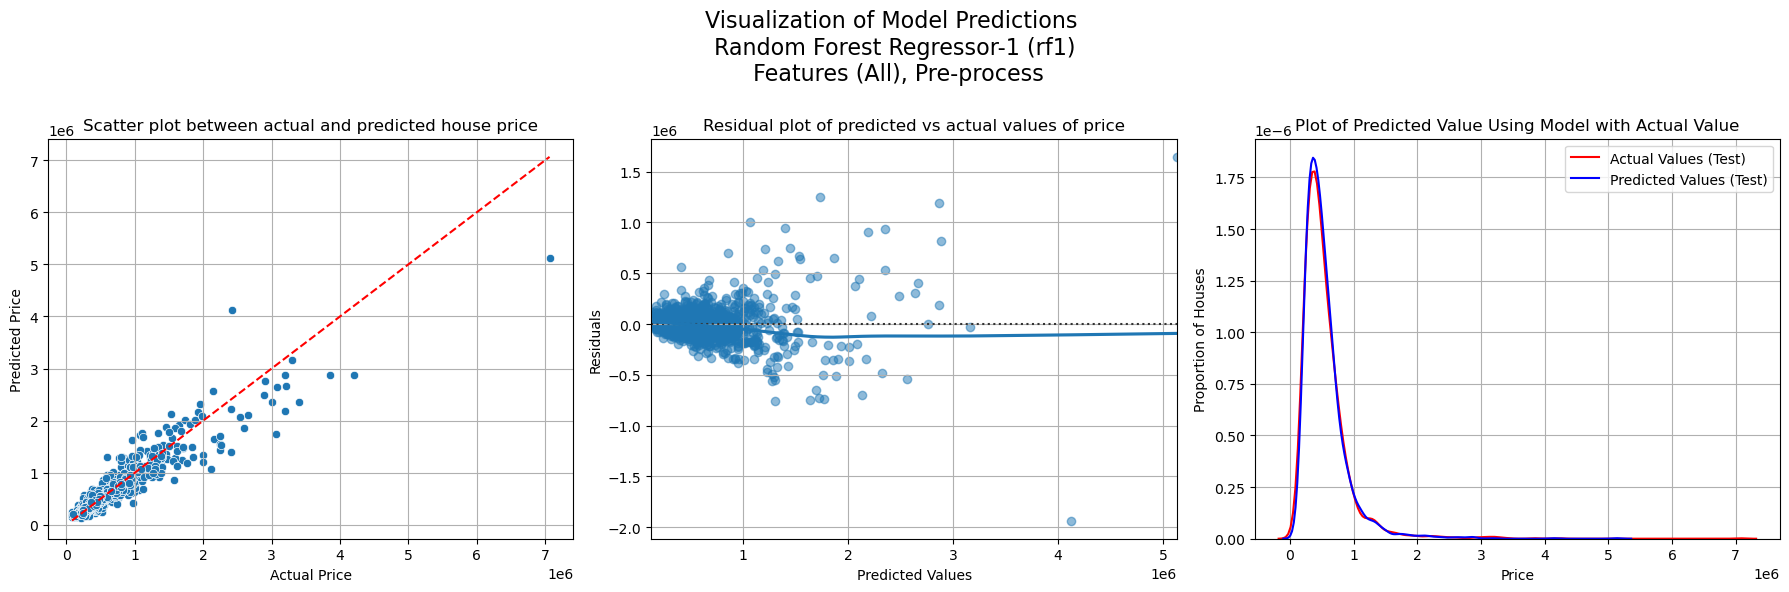

In [115]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the scatter plot between actual and predicted house price
predictions = rf1.predict(x_test)
sns.scatterplot(x=y_test, y=predictions, ax=axes[0])
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Scatter plot between actual and predicted house price')
axes[0].grid()
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Calculate residuals
residuals = y_test - predictions

# Plot the residual plot
sns.residplot(x=predictions, y=residuals, lowess=True, ax=axes[1], scatter_kws={'alpha': 0.5})
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid()
axes[1].set_title('Residual plot of predicted vs actual values of price')

# Plot the distribution plot
Title = 'Plot of Predicted Value Using Model with Actual Value'
sns.distplot(y_test, hist=False, color="r", label="Actual Values (Test)", ax=axes[2])
sns.distplot(predictions, hist=False, color="b", label="Predicted Values (Test)", ax=axes[2])
axes[2].set_title(Title)
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Proportion of Houses')
axes[2].grid()
axes[2].legend()

# Add super title
fig.suptitle('Visualization of Model Predictions \n Random Forest Regressor-1 (rf1) \n Features (All), Pre-process', fontsize=16)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Lets check the performance of other models 'mlr4' and 'slr'.

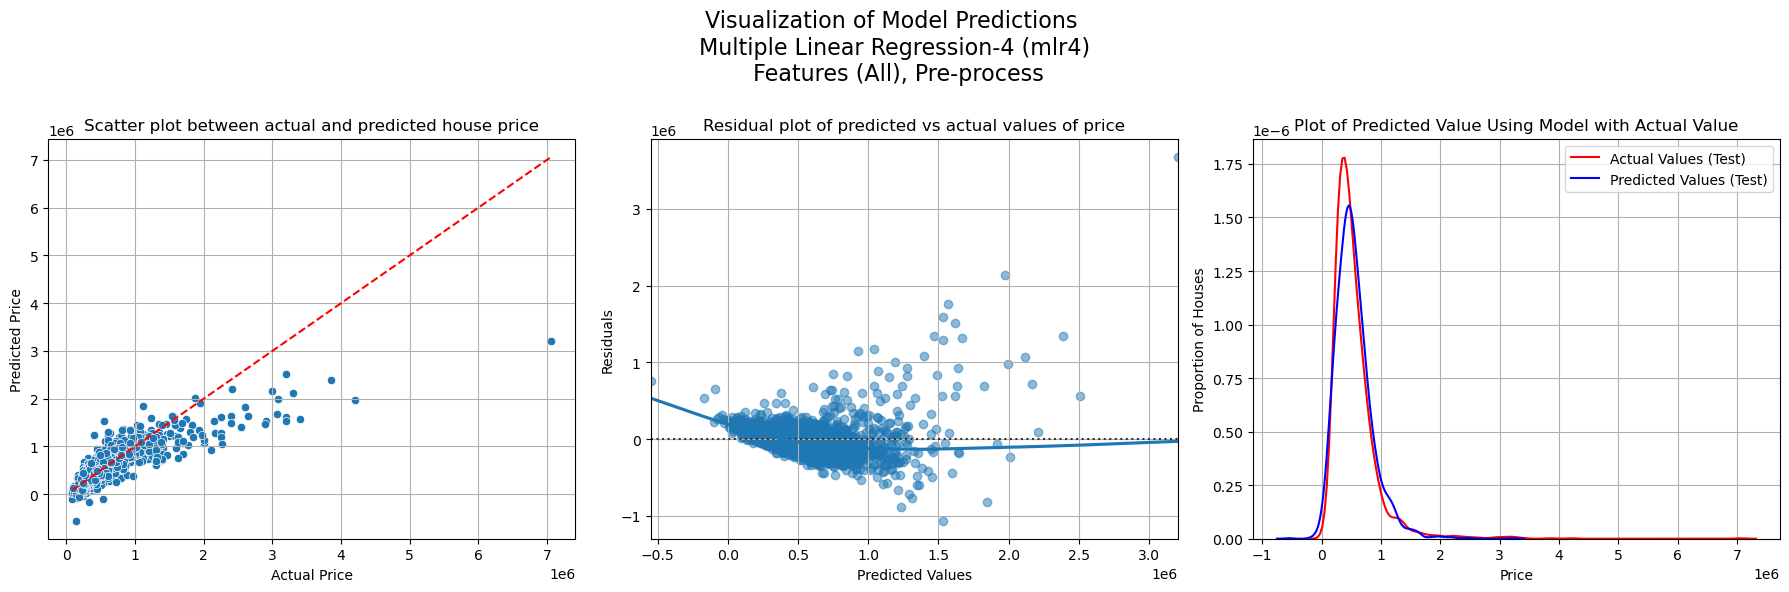

In [116]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the scatter plot between actual and predicted house price
predictions = mlr4.predict(x_test)
sns.scatterplot(x=y_test, y=predictions, ax=axes[0])
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Scatter plot between actual and predicted house price')
axes[0].grid()
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Calculate residuals
residuals = y_test - predictions

# Plot the residual plot
sns.residplot(x=predictions, y=residuals, lowess=True, ax=axes[1], scatter_kws={'alpha': 0.5})
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid()
axes[1].set_title('Residual plot of predicted vs actual values of price')

# Plot the distribution plot
Title = 'Plot of Predicted Value Using Model with Actual Value'
sns.distplot(y_test, hist=False, color="r", label="Actual Values (Test)", ax=axes[2])
sns.distplot(predictions, hist=False, color="b", label="Predicted Values (Test)", ax=axes[2])
axes[2].set_title(Title)
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Proportion of Houses')
axes[2].grid()
axes[2].legend()

# Add super title
fig.suptitle('Visualization of Model Predictions \n Multiple Linear Regression-4 (mlr4) \n Features (All), Pre-process', fontsize=16)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

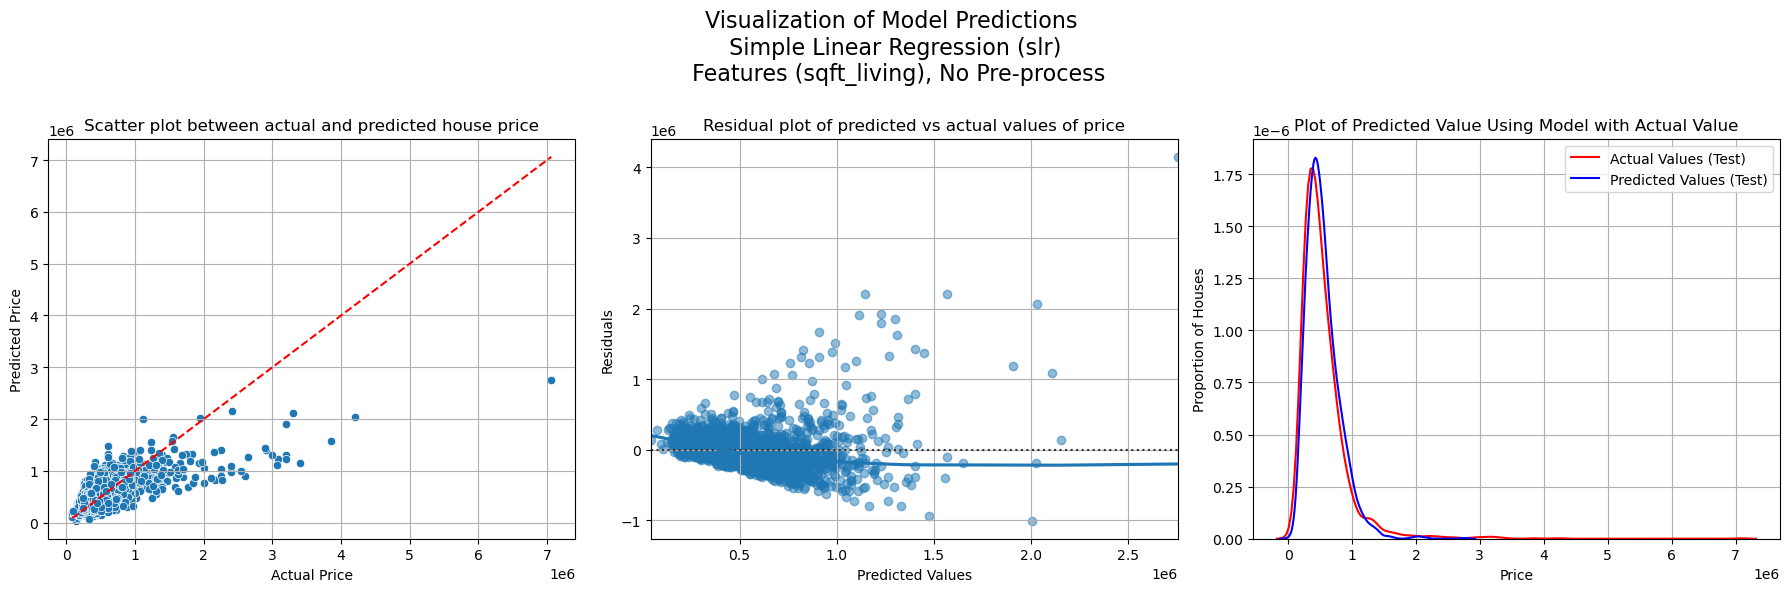

In [119]:
y_test1 = y_test
x_test1 = x_test[['sqft_living']]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the scatter plot between actual and predicted house price
predictions = slr.predict(x_test1)
sns.scatterplot(x=y_test1, y=predictions, ax=axes[0])
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Scatter plot between actual and predicted house price')
axes[0].grid()
axes[0].plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--')

# Calculate residuals
residuals = y_test - predictions

# Plot the residual plot
sns.residplot(x=predictions, y=residuals, lowess=True, ax=axes[1], scatter_kws={'alpha': 0.5})
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid()
axes[1].set_title('Residual plot of predicted vs actual values of price')

# Plot the distribution plot
Title = 'Plot of Predicted Value Using Model with Actual Value'
sns.distplot(y_test1, hist=False, color="r", label="Actual Values (Test)", ax=axes[2])
sns.distplot(predictions, hist=False, color="b", label="Predicted Values (Test)", ax=axes[2])
axes[2].set_title(Title)
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Proportion of Houses')
axes[2].grid()
axes[2].legend()

# Add super title
fig.suptitle('Visualization of Model Predictions \n Simple Linear Regression (slr) \n Features (sqft_living), No Pre-process', fontsize=16)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Visualize top 10 models.

In [125]:
models_table10 = models_table.head(10)

Text(0.5, 1.0, 'Comparison of Cross-Validated RMSE Across Different Models')

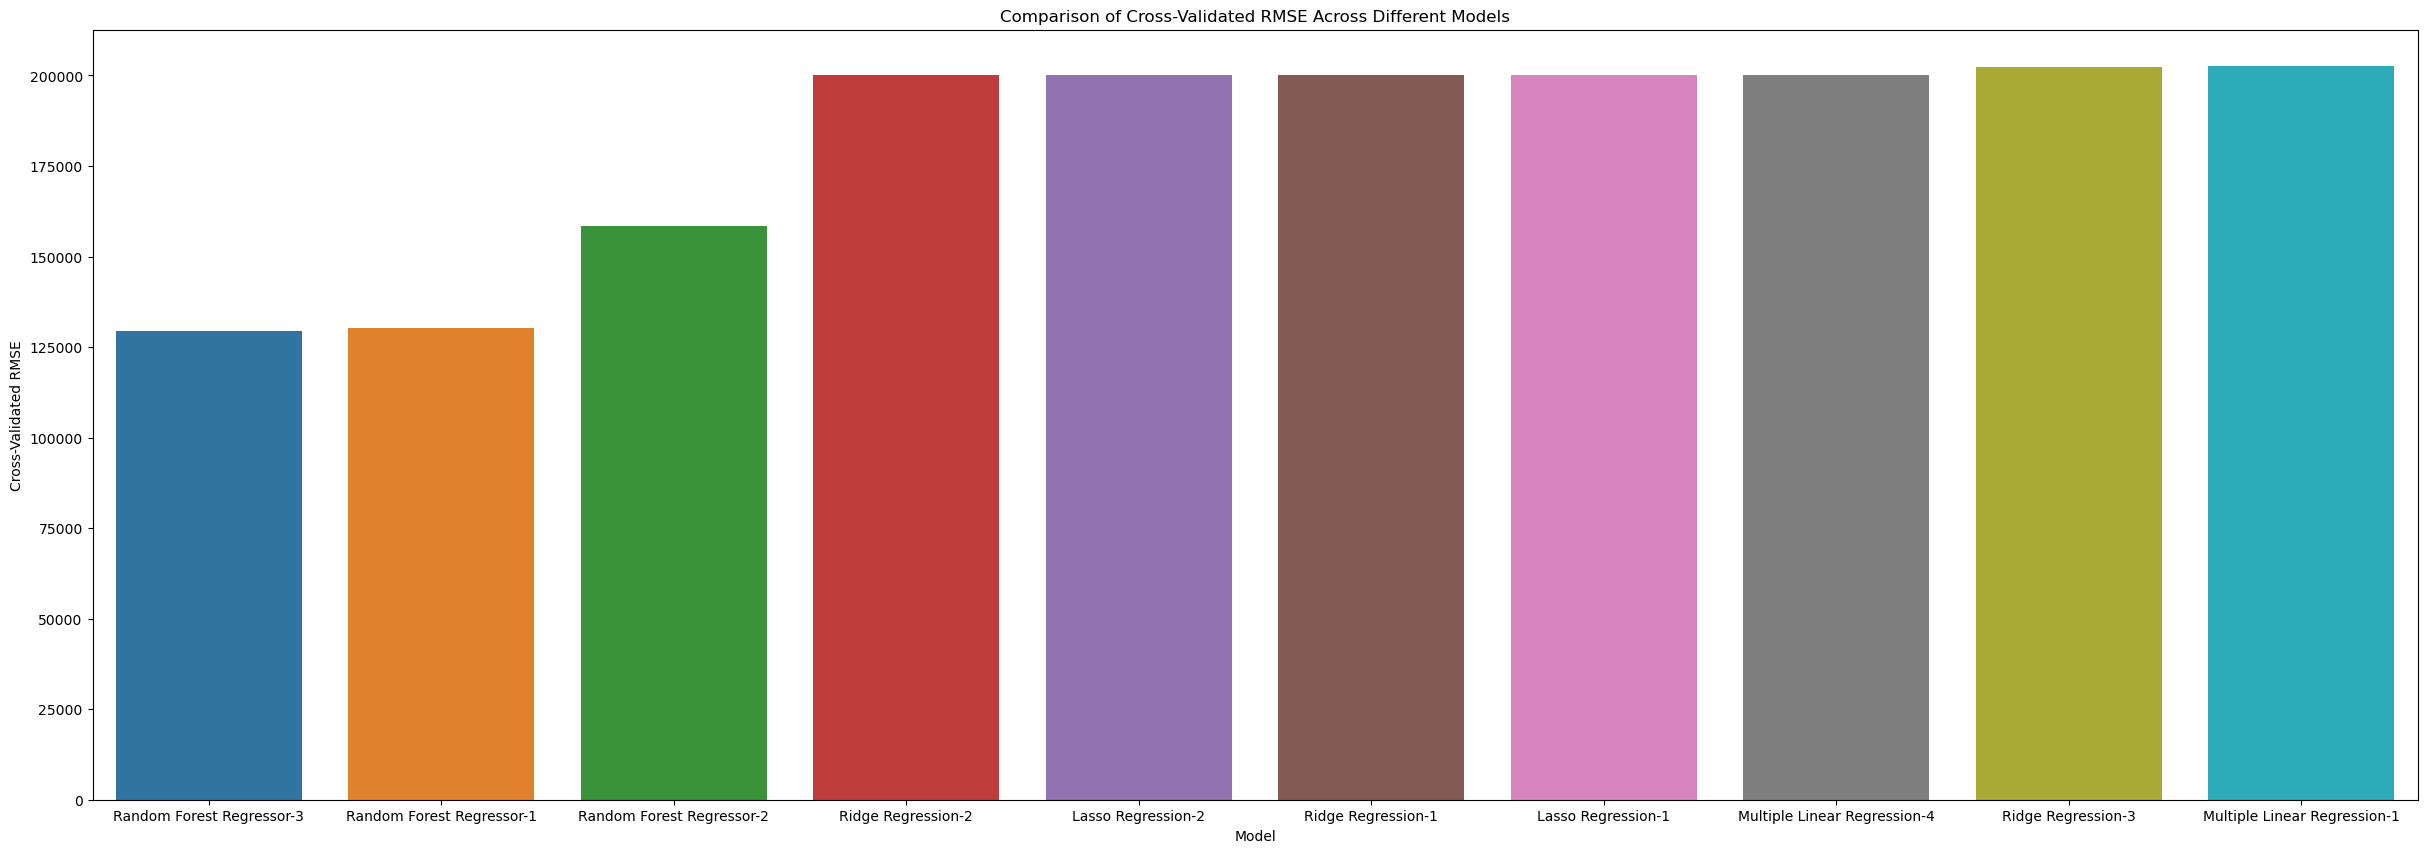

In [128]:
plt.figure(figsize=(30, 10))

sorted_models = models_table10.sort_values(by='Cross-Validated RMSE')
sns.barplot(x='Model', y='Cross-Validated RMSE', data=sorted_models)
plt.title("Comparison of Cross-Validated RMSE Across Different Models")

In [131]:
models_table.sort_values('Cross-Validated RMSE')

,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Random Forest Regressor-3,rf3,"Features (All), No Pre-process",0.982947,0.9829326370940544,142265.752505,0.873822,0.8737173081576125,129475.668059,0.874010
1,Random Forest Regressor-1,rf1,"Features (All), Pre-process",0.982732,0.9827052971543786,141516.332050,0.875148,0.8749573960126045,130135.364924,0.876313
19,Random Forest Regressor-4,rf4,"min_samples_split = 2, min_samples_leaf = 3, m...",0.962571,0.962514,144843.083014,0.869209,0.869009,131603.223959,0.870560
2,Random Forest Regressor-2,rf2,"Features (corr>0.1), Pre-process",0.973770,0.9737530277606906,172362.541909,0.814789,0.8146688414706987,158550.178204,0.810960
3,Ridge Regression-2,rm2,"alpha = 10, Features (All), Pre-process",0.708865,0.7084199704126287,223701.621594,0.688025,0.6875481168292614,200153.883927,0.701806
4,Lasso Regression-2,lm2,"alpha = 10, Features (All), Pre-process",0.709008,0.7085634007407488,223188.100530,0.689456,0.6889809760107755,200165.206551,0.701753
5,Ridge Regression-1,rm1,"alpha = 1, Features (All), Pre-process",0.709010,0.7085645789249735,223218.552226,0.689371,0.6888960995971063,200167.338096,0.701749
6,Lasso Regression-1,lm1,"alpha = 1, Features (All), Pre-process",0.709012,0.708566794560971,223166.633700,0.689516,0.689040802419646,200175.542399,0.701722
7,Multiple Linear Regression-4,mlr4,"Features (All), Pre-process",0.709047,0.7086019647440626,223105.241120,0.689686,0.6892118670748867,200182.208543,0.701702
8,Ridge Regression-3,rm3,"alpha = 100, Features (All), Pre-process",0.702932,0.7024778832184858,227737.911832,0.676666,0.6761711404073993,202259.404430,0.695569


# 6. Results Interpretation

From the provided summary table about how well models predict house prices using 5-fold cross-validation, we can learn some useful things:

1. **Best Model Performance:** The model that stood out the most is 'Random Forest Regressor-3' (rf3). It achieved high cross-validated R2 scores and low cross-validated RMSE values on both the training and test sets. This suggests its effectiveness in capturing the underlying patterns in the data, and these results are backed by the use of cross-validation.

2. **Hyperparameter Tuning and Preprocessing Impact:** Notably, the 'Random Forest Regressor-4' (rf4) stands out. Despite adjustments made through hyperparameter tuning, its performance remains comparable to the default setting model ('rf3'). This emphasizes that while hyperparameter tuning and preprocessing can enhance model outcomes, there's a point at which additional tuning might not lead to substantial improvements.

3. **Comparing with Baseline Models:** When we look at the Simple Linear Regression (slr) model, we see that it didn't perform well in comparison to other models. This means that more complex models like Random Forest and other regression techniques (Ridge, Lasso, Multiple Linear Regression) are better suited for capturing the relationships in this dataset.

4. **Support Vector Regression Performance:** The Support Vector Regression (svr) models didn't show good performance. However, it's important to consider that this might be due to issues in how the models were developed rather than the inherent nature of the algorithm.

5. **Effect of Feature Preprocessing:** Comparing the 'Random Forest Regressor-3' model with 'Random Forest Regressor-1' and 'Random Forest Regressor-2', it's clear that feature preprocessing might not significantly improve results in this specific context. The models with feature preprocessing didn't outperform the default setting model ('rf3') by a large margin.

In the end, the results from the models help us understand how well they predict house prices using 5-fold cross-validation, what kinds of methods work best, and how much changing things before running the models really matters. While some models are a bit different, the big idea is that we should choose models that fit the data and find a balance between changing features, tuning, and making things more complicated.

----------------------------------------------------

### Thank you for taking the time to review my notebook!

Your attention and feedback are greatly appreciated!

**Linkedin:** [Link](https://www.linkedin.com/in/hazmannaim/)

**Github:** [Link](https://github.com/HazmanNaim)

**Kaggle:** [Link](https://www.kaggle.com/hazmannaim)